# Homework 2 LAB: Classification - Daniella Salima

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import (classification_report, confusion_matrix,  
                             roc_auc_score, roc_curve, accuracy_score) 
import warnings 
warnings.filterwarnings('ignore') 

# Load Data

In [7]:
 
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',  
                'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'] 
 
df = pd.read_csv('heart.csv', names=column_names)

# Display basic info 

In [8]:
print(df.head()) 
print(f"\nDataset Shape: {df.shape}") 
print(f"\nMissing Values:\n{df.isnull().sum()}") 
print(f"\nTarget Distribution:\n{df['target'].value_counts()}") 
print(f"\nBasic Statistics:\n{df.describe()}") 

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0  age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope   
1   52    1   0       125   212    0        1      168      0        1      2   
2   53    1   0       140   203    1        0      155      1      3.1      0   
3   70    1   0       145   174    0        1      125      1      2.6      0   
4   61    1   0       148   203    0        1      161      0        0      2   

   ca  thal  target  
0  ca  thal  target  
1   2     3       0  
2   0     3       0  
3   0     3       0  
4   1     3       0  

Dataset Shape: (1026, 14)

Missing Values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Target Distribution:
target
1         526
0         499
target      1
Name: count, dtype: int64

Basic Statistics:
         age

# Visualize target distribution

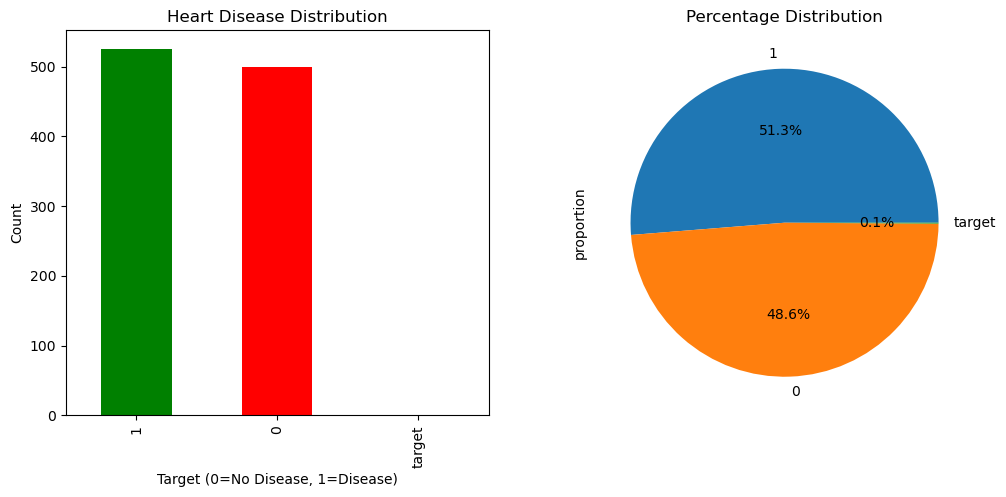

In [9]:
# Visualize target distribution 
plt.figure(figsize=(12, 5)) 
 
plt.subplot(1, 2, 1) 
df['target'].value_counts().plot(kind='bar', color=['yellow', 'red']) 
plt.title('Heart Disease Distribution') 
plt.xlabel('Target (0=No Disease, 1=Disease)') 
plt.ylabel('Count') 
 
plt.subplot(1, 2, 2) 
df['target'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%') 
plt.title('Percentage Distribution') 
plt.show() 

# Split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(df['target'].value_counts())

target
1         526
0         499
target      1
Name: count, dtype: int64


In [15]:
print(X_train.dtypes)

age         object
sex         object
cp          object
trestbps    object
chol        object
fbs         object
restecg     object
thalach     object
exang       object
oldpeak     object
slope       object
ca          object
thal        object
dtype: object


In [16]:
df = pd.read_csv('heart.csv', names=column_names)

In [17]:
df = pd.read_csv('heart.csv', names=column_names, header=0)

In [18]:
df = df[pd.to_numeric(df['age'], errors='coerce').notnull()]
df = df.astype(float)  # convert all to numeric

In [19]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
print(df.head())
print(df.dtypes)

    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  52.0  1.0  0.0     125.0  212.0  0.0      1.0    168.0    0.0      1.0   
1  53.0  1.0  0.0     140.0  203.0  1.0      0.0    155.0    1.0      3.1   
2  70.0  1.0  0.0     145.0  174.0  0.0      1.0    125.0    1.0      2.6   
3  61.0  1.0  0.0     148.0  203.0  0.0      1.0    161.0    0.0      0.0   
4  62.0  0.0  0.0     138.0  294.0  1.0      1.0    106.0    0.0      1.9   

   slope   ca  thal  target  
0    2.0  2.0   3.0     0.0  
1    0.0  0.0   3.0     0.0  
2    0.0  0.0   3.0     0.0  
3    2.0  1.0   3.0     0.0  
4    1.0  3.0   2.0     0.0  
age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
target      float64
dtype: object


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_lr = log_reg.predict(X_test_scaled)
y_prob_lr = log_reg.predict_proba(X_test_scaled)[:, 1]

# Random Forest
rf = RandomForestClassifier(n_estimators=300, class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)  # RF doesn’t need scaling
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]


--- Logistic Regression ---
Accuracy: 0.8097560975609757
ROC-AUC: 0.9299999999999999
Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.70      0.78       100
         1.0       0.76      0.91      0.83       105

    accuracy                           0.81       205
   macro avg       0.82      0.81      0.81       205
weighted avg       0.82      0.81      0.81       205



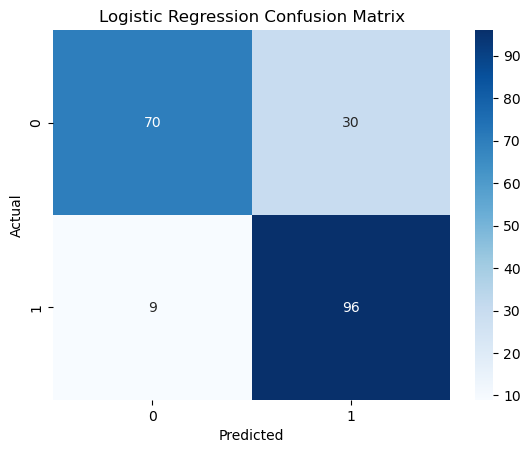


--- Random Forest ---
Accuracy: 1.0
ROC-AUC: 1.0
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       100
         1.0       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



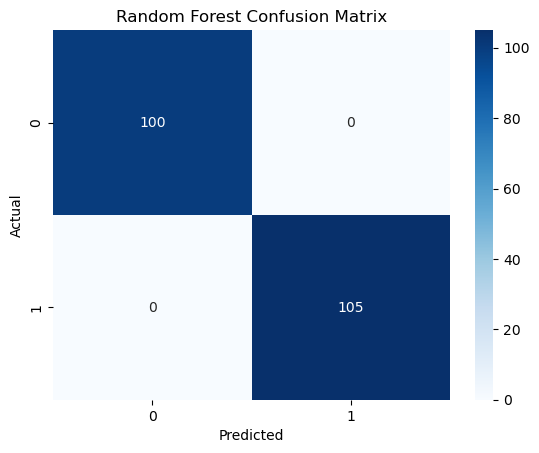

In [22]:
def evaluate_model(y_true, y_pred, y_prob, model_name):
    print(f"\n--- {model_name} ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("ROC-AUC:", roc_auc_score(y_true, y_prob))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted'); plt.ylabel('Actual')
    plt.show()

evaluate_model(y_test, y_pred_lr, y_prob_lr, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, y_prob_rf, "Random Forest")

In [24]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    accuracy_score
)

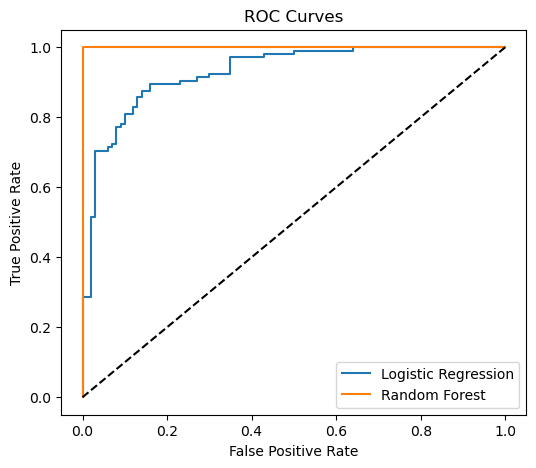

In [25]:
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

plt.figure(figsize=(6,5))
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

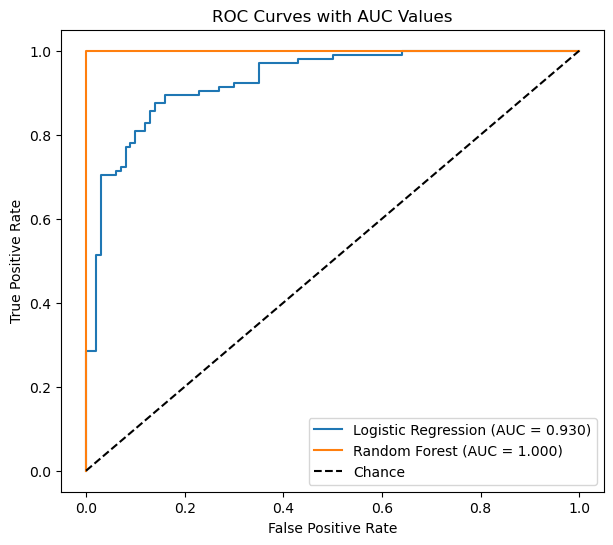

In [26]:
from sklearn.metrics import roc_curve, roc_auc_score

# Compute ROC curve and AUC for Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
auc_lr = roc_auc_score(y_test, y_prob_lr)

# Compute ROC curve and AUC for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)

# Plot ROC curves with AUC in the legend
plt.figure(figsize=(7,6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.3f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.3f})')

# Chance line
plt.plot([0,1], [0,1], 'k--', label='Chance')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves with AUC Values')
plt.legend(loc='lower right')
plt.show()